## in this project we need to project the sevral model to predict the pricing the used cars 

#### some questions we need to answer in this model .
1- Do i know if the dealer if offring the fair value for my trade-in?
2- Do i know if i put the fair value on my car?

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [3]:
# dowload the dataset file.
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

In [9]:
# dowload the file online and open it.
def loudFile(url, file_name):
    response = requests.get(url)
    if response.status_code == 200:
        with open(file_name,"wb") as file:
            file.write(response.content)

In [10]:
loudFile(file_path,"car_use.csv")
fileName = "car_use.csv"

In [120]:
# to raed the csv file.
df = pd.read_csv(fileName, header=0) # this data had header in thne frist row.

In [121]:
df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [122]:
# first we have to check the all data is clean and there is null value .
def missing_val(dataset):
    null_val =dataset.isnull()
    for column in null_val.columns.values.tolist():
        null_count_val = null_val[column].sum()
        if null_count_val > 0 :
            print(f"{column}")
            print(f"we have {null_count_val} null value in this column. ")
            print("")
            print("---------------------⛔⛔⛔⛔--------------------------")
        else :
            print(f"the column name {column} is clean from the null")
            print("")
            print("---------------------'👌👌👌👌'--------------------------")
    return

In [566]:
missing_val(df)

the column name symboling is clean from the null

---------------------'👌👌👌👌'--------------------------
the column name normalized-losses is clean from the null

---------------------'👌👌👌👌'--------------------------
the column name make is clean from the null

---------------------'👌👌👌👌'--------------------------
the column name aspiration is clean from the null

---------------------'👌👌👌👌'--------------------------
the column name num-of-doors is clean from the null

---------------------'👌👌👌👌'--------------------------
the column name body-style is clean from the null

---------------------'👌👌👌👌'--------------------------
the column name drive-wheels is clean from the null

---------------------'👌👌👌👌'--------------------------
the column name engine-location is clean from the null

---------------------'👌👌👌👌'--------------------------
the column name wheel-base is clean from the null

---------------------'👌👌👌👌'--------------------------
the column name length is clean from the null


In [124]:
# we have to columns need to cleaning [stroke, horsepower]

cleaning_val = df[["stroke", "horsepower-binned"]]

In [125]:
# cleaning the stroke
#cleaning_val["stroke"].value_counts()
# replace the 4 null value with the frequntly value in the columns {3.40}
df["stroke"].replace(np.nan,3.40,inplace=True)

In [126]:
# cleaning horsepower column.
cleaning_val["horsepower-binned"].value_counts()
# we will repalce it with the most frequntcy data. 68
df["horsepower-binned"].replace(np.nan,"low",inplace=True)

##### now we can start the task with the clean data from the missing value.

In [58]:
# some notes in this data.
# x = the prodictor variable / independent variable.
# Y = the response / dependent variable (which i need to predict)
# a = intercept of regression
# b = slope of regression
# the linear funcation for the data.

#    yhat = a + bx

In [127]:
# to load the linear regression is modules is.
from sklearn.linear_model import LinearRegression
# create linear regression model object as lm
lm= LinearRegression()
lm

LinearRegression()

In [570]:
# the question is how can the highway-mpg help us to to prodict car price ? 
# the responce/independent variable  is highway-mpg is x
x = df[["highway-mpg"]] # two squer pracet to put it inn data frame.
# the predictor/dependent variable is price which i want predict. is y
y = df["price"]
# fit the linear model
lm.fit(x,y)
# we  can outpit the prediction.
yhat=lm.predict(x) 
yhat

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508, 17879.97140011, 17879.97140011, 17879.97140011,
       21988.63829172, 14593.03788682, 14593.03788682, 15414.77126514,
       15414.77126514, 17879.97140011, 20345.17153508, 20345.17153508,
       21988.63829172, -5128.5631929 ,  3088.77059031,  3088.77059031,
        4732.23734696,  7197.43748192, 13771.3045085 ,  7197.43748192,
        7197.43748192,  7197.43748192, 13771.3045085 , 13771.3045085 ,
       18701.70477843, -5950.29657123,  7197.43748192,  3910.50396864,
       10484.37099521, 10484.37099521, 10484.37099521, 10484.37099521,
       11306.10437353, 11306.10437353, 11306.10437353, 11306.10437353,
       15414.77126514, 12949.57113018, 14593.03788682, 14593.03788682,
       22810.37167004, 22810.37167004, 24453.83842668, 12949.57113018,
        7197.43748192,  7197.43748192,  7197.43748192,  7197.43748192,
       19523.43815675, 19523.43815675, 19523.43815675, 19523.43815675,
      

In [129]:
# What is the value of the intercept (a)?
lm.intercept_

#What is the value of the slope (b)?
slope = lm.coef_
slope

array([-821.73337832])

In [130]:
lm.intercept_

38423.305858157386

In [131]:
# can calculate the intecept. b = depentent_variable_maen_y - coefficient associated with x * mean indepentent_variable_ x.
x_mean = x.mean() #indepentent_variable
y_mean = y.mean() #depentent_variable
b_intercept  = y_mean - slope * x_mean
b_intercept
# the same result of lm.intercept_

highway-mpg    38423.305858
dtype: float64

In [136]:
# finaly i can make prediction for used car price .
# yhat = intercept + slope* independent_variable.
price_used =  38423.31 + -821.73 * df["highway-mpg"]
price_used.rename(columns={"highway-mpg":"used_price"},inpalce=True)

TypeError: Series.rename() got an unexpected keyword argument 'columns'

In [151]:
testused = 38423.31 + (-821.73 * 27)
testused

16236.599999999999

In [139]:
# to rename the columns name
price_used = price_used.to_frame()
price_used.rename(columns={"highway-mpg":"used_price"},inplace=True)

In [140]:
price_used

,used_price
0,16236.60
1,16236.60
2,17058.33
3,13771.41
4,20345.25
...,...
196,15414.87
197,17880.06
198,19523.52
199,16236.60


In [141]:
# to merg the ued car price to the data from.
df=pd.concat([df,price_used],axis=1)

In [145]:
df.drop("used_price",axis=1,inplace=True)

In [146]:
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


### Question for lab.

In [160]:
# create model 
lm1=LinearRegression()
lm1.fit(df[["engine-size"]],
       df[["price"]])


LinearRegression()

In [161]:
# find the slope and intercept
lm1.intercept_

array([-7963.33890628])

In [162]:
lm1.coef_

array([[166.86001569]])

In [165]:
#What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".
yhat = -7963.33890628 + 166.86001569*df["engine-size"]
round(yhat,2) 

0      13728.46
1      13728.46
2      17399.38
3      10224.40
4      14729.62
         ...   
196    15563.92
197    15563.92
198    20903.44
199    16231.36
200    15563.92
Name: engine-size, Length: 201, dtype: float64

## Multiple linear regression "more realistic in the real world"

In [166]:
# the equation for the multiple linear regression
#yhat = a + b1x1+ b2x2+ b3x3+ b4x4
#predictor_price = intercept_ + slope_1*indepentent_variabnle_1 

In [240]:
    def correla(dataset, target):
        df_corre = dataset.select_dtypes(include=['float64','int64']) # to read only flaot and int
        for column in df_corre.columns.values.tolist():
            corre = df_corre[column].corr(df_corre[target])

            if (1 > corre) & (corre > 0.8):
                print(f"the column name :{column}")
                print(f"Strong positive relationship with value: {corre}")
                print("--------------------------------------------------")
                print("")
            elif (corre < -0.7) & (corre > -1):
                print(f"the column name :{column}")
                print(f"Strong negative relationship with value: {corre}" )
                print("--------------------------------------------------")
                print("")
    #        else:
    #            print(f"the column name :{column}")
    #            print(f"Not a strong correlation with value: {corre}")
    #            print("-----------------False---------------------")
    #            print("")
        return 

    # Example usage
    correla(df, "price")


the column name :curb-weight
Strong positive relationship with value: 0.8344145257702844
--------------------------------------------------

the column name :engine-size
Strong positive relationship with value: 0.8723351674455185
--------------------------------------------------

the column name :horsepower
Strong positive relationship with value: 0.809574567003656
--------------------------------------------------

the column name :highway-mpg
Strong negative relationship with value: -0.704692265058953
--------------------------------------------------

the column name :price
Strong positive relationship with value: 0.9999999999999999
--------------------------------------------------



In [384]:
# we have 4 columns has high corelationship in this data.
Z = df[["curb-weight","engine-size","horsepower","highway-mpg"]]

In [385]:
# fit the linear model 
lm.fit(Z,df["price"])

LinearRegression()

In [386]:
# intercept value.
intercept_df = lm.intercept_
intercept_df

-15806.624626329227

In [387]:
# the value of coefficients.
slope_df = lm.coef_
slope_df

array([ 4.70770099, 81.53026382, 53.49574423, 36.05748882])

In [355]:
#price_car = intercept_df + (slope_df[0] * Z["curb-weight"] )
#price_car
def car_price(slope,intercept,var):
    interc = float(intercept)
    slope_1 = slope
    var_df = var.columns.values.tolist()
    final_price_car = 0
    for slp, column in zip(slope_1, var_df):
        price_car = interc + (slp * var[column])
        final_price_car += price_car
    print(f" the car price {final_price_car}")
        

In [356]:
car_price(slope_df,intercept_df,Z)

 the car price 0     -33720.762267
1     -33720.762267
2     -28368.219177
3     -36799.511949
4     -31898.559677
           ...     
196   -30725.473442
197   -27916.194677
198   -26944.415499
199   -29615.835066
200   -30315.798799
Name: curb-weight, Length: 201, dtype: float64


In [357]:
price_car_1 = intercept_df + (slope_df[0] * Z["curb-weight"] )
price_car_1

0     -3811.402492
1     -3811.402492
2     -2516.784719
3     -4804.727402
4     -2512.077018
          ...     
196   -1909.491290
197   -1452.844294
198   -1627.029231
199    -661.950527
200   -1391.644181
Name: curb-weight, Length: 201, dtype: float64

In [358]:
lm_2=LinearRegression()

In [360]:
lm_2.fit(df[["normalized-losses","highway-mpg"]],df["price"])

LinearRegression()

In [361]:
# finf coefficin of the model.
lm_2.coef_

array([   1.49789586, -820.45434016])

In [362]:
lm_2.intercept_

38201.31327245727

## Regression plot 

(0.0, 48179.49106469868)

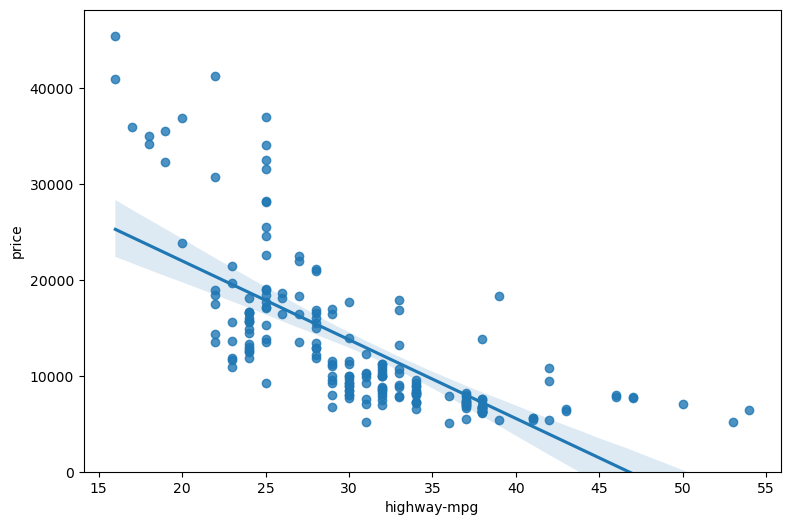

In [365]:
# visulaize the highway-mpg as potential prodictor of price.
width = 9
hight = 6
plt.figure(figsize=(width,hight))
sns.regplot(x="highway-mpg",y="price",data=df)
plt.ylim(0,)

(0.0, 47414.1)

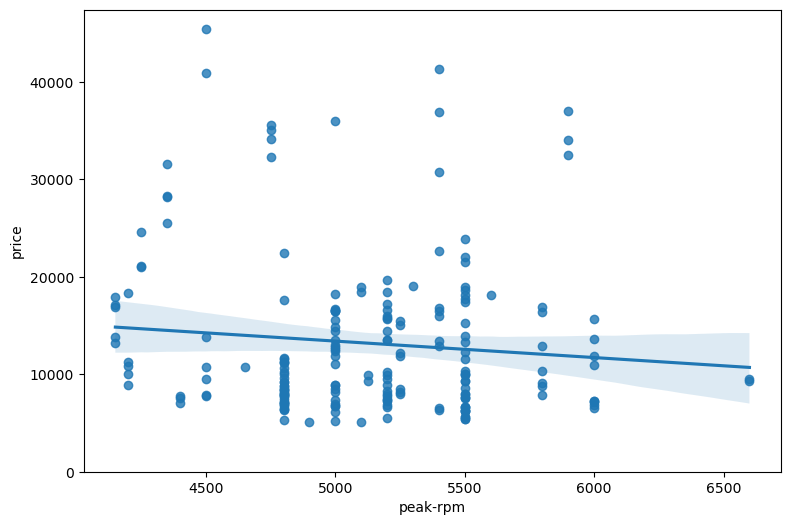

In [366]:
# create the regression plot pf peak-rpm
width = 9
hight = 6
plt.figure(figsize=(width,hight))
sns.regplot(x="peak-rpm",y="price",data=df)
plt.ylim(0,)

In [370]:
# which of the variable "peak-rpm" " highway-mpg" more stronges corelated to the price.
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


# Residual plot

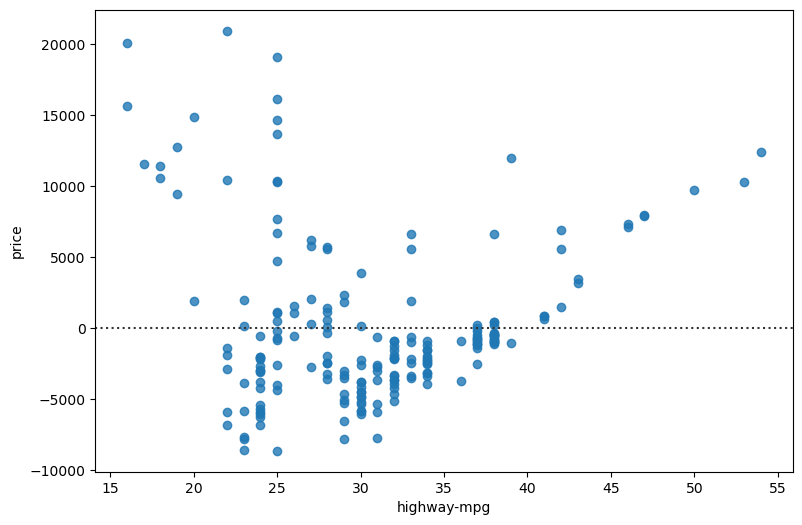

In [371]:
# we can drow the first residual plot
width = 9 
height = 6
plt.figure(figsize=(width,height))
sns.residplot(x=df["highway-mpg"],y=df["price"])
plt.show()


In [395]:
# this funcation just for extract the missing value from the table or dataset 
# for columns each separately
def missingVal(dataset):
    data_null = dataset.isnull()
    for column in data_null.columns.values.tolist():
        # sum the number of column which is has null value.
        null_count = data_null[column].sum()
        if null_count > 0:
            print(f"column name : {column}")
            print(f"null count : {null_count}")
            print(f"non - null count : {len(dataset) - null_count}")
            print(f"type of data : {dataset[column].dtype}")
            print("")
        else:
            print(f" the column name : {column}")
            print("not data Missing")
    return 


In [397]:
# there is no missing data Exist  in Z .
missingVal(Z)

 the column name : curb-weight
not data Missing
 the column name : engine-size
not data Missing
 the column name : horsepower
not data Missing
 the column name : highway-mpg
not data Missing


In [396]:
# the only way to check the fit model is look at the distribution plot and compare it with actual value.
Yhat = lm.predict(Z)

C:\Users\Mohamed Asharf\AppData\Local\Temp\ipykernel_46620\3651648408.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df["price"],hist=False, color="r",label="Actual Value")
C:\Users\Mohamed Asharf\AppData\Local\Temp\ipykernel_46620\3651648408.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

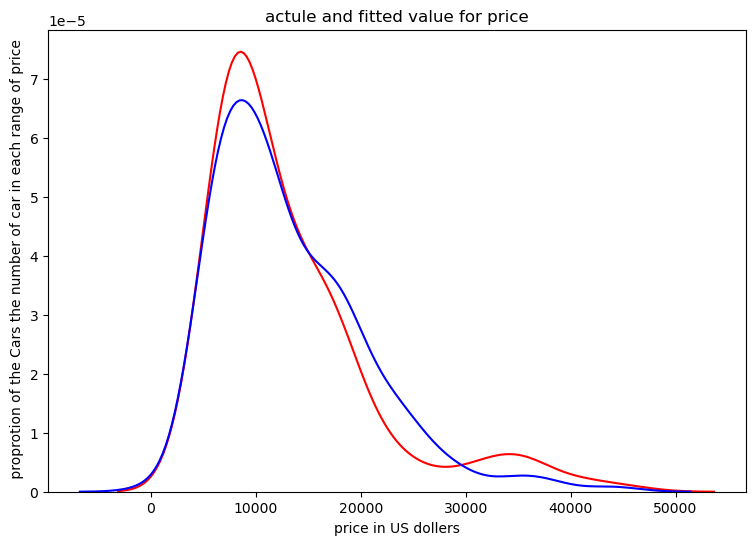

In [398]:
# indentfing the width and height.
plt.figure(figsize=(width,height))
# create teh distrbution for actual value.
ax1 = sns.distplot(df["price"],hist=False, color="r",label="Actual Value")
# and then i can create distribution for the fitted value. and make the color broun.
sns.distplot(Yhat,hist=False, color="b",label="Fitted Value",ax=ax1)
plt.title("actule and fitted value for price")
plt.xlabel("price in US dollers")
plt.ylabel(" proprotion of the Cars the number of car in each range of price")
plt.show()
plt.close()


In [508]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    # this is part to drowing the pipline length to cover all the x-axis
    x_new = np.linspace(15, 55, 100)  # the num  is the number of seteps in between the range of linspace.
    y_new = model(x_new) # 

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca() # this is for acciss to backgroup of graph.
    ax.set_facecolor((0.898, 0.898, 0.898)) # the color of  it background.
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [512]:
x = df['highway-mpg']
y = df['price']

In [513]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f) # to read f value as one dimantion "one line".
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


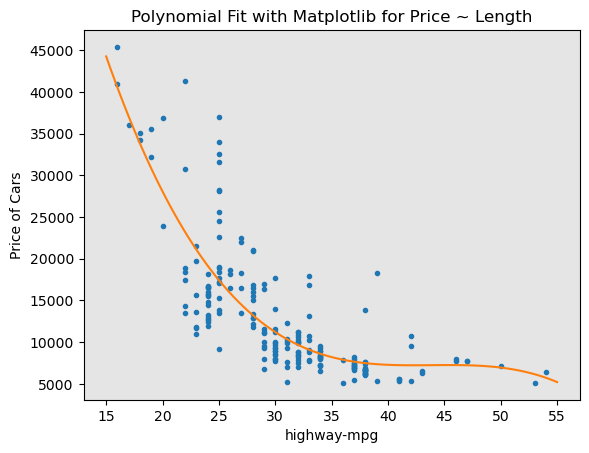

In [514]:
# explaination for this funcation..
# p = this for drowing cubic polynomial pipline in the plot.
# x = independed variable
# y = dependent variable 
# name = the data of y axis (independent vargiable)
PlotPolly(p, x, y, 'highway-mpg')

In [516]:
# create 11 order polynomial model with the the same variable above.
f = np.polyfit(x,y,11)
p = np.poly1d(f)
print(f)

[-1.24263380e-08  4.72184851e-06 -8.02843411e-04  8.05640232e-02
 -5.29740934e+00  2.39470307e+02 -7.58845671e+03  1.68447238e+05
 -2.56531128e+06  2.55140598e+07 -1.49106950e+08  3.87930048e+08]


PlotPolly(p,x,y,"highway-mpg")

In [518]:
# import the model of multivariate polynomial funcation
from sklearn.preprocessing import PolynomialFeatures

In [519]:
# create polynominal feature with 2 degrees
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [521]:
Z_pr=pr.fit_transform(Z)

In [523]:
# in the original data we have 201 sample and 4 features.
Z.shape

(201, 4)

In [524]:
Z_pr.shape

(201, 15)

In [531]:
# the pipline is steps of prossessing the data import libirery.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [534]:
# we can create pipeline toa list of the tables.
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())] 

In [537]:
# we put the list as argument pipeling
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [539]:
# we can convert the data type to float to avoid any converting issue.
Z =Z.astype(float)
pipe.fit(Z,y) # Z = the independent variable mulitple linear regression. y= dependent variable "price"


Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [542]:
# we can nurmalize the data and preforme the transformation.
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [559]:
## question... craete pipeline standerdizes teh data to preduce a prediction and lineregression.
Input_1 = [('scale',StandardScaler()),('model',LinearRegression())]
Input_1

[('scale', StandardScaler()), ('model', LinearRegression())]

In [560]:
# list argument pipeline.
pipe_1 = Pipeline(Input_1)
pipe_1

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [562]:
#pipe_1.fit(Z,y)
pipe_1.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [567]:
ypipe = pipe_1.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

## maesure in-sample Eveluations

In [572]:
# sample linear regression.
lm.fit(x,y)
# to find the R^2
print("the r-Square is: ", lm.score(x,y))

the r-Square is:  0.4965911884339175


In [575]:
# we can prodict the output.
yhat = lm.predict(x)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [13699.11161184 13699.11161184 19051.65470233 10620.36193015]


### import funcation mean squared errer

In [576]:
from sklearn.metrics import mean_squared_error

In [578]:
# with this funcation we can compare the predict result with the actual result of price.
mse = mean_squared_error(df["price"],yhat)
print(f"the mean squated error of price and predicted value is: {mse}")
# THE heigher Mse value represent the heigher error compared bwtween the actual value and predited value.


the mean squated error of price and predicted value is: 31635042.944639895


#### use MSE with multipale linear regressions.

In [580]:
# fit the model.
lm.fit(Z,df["price"])
# find R^2.
print(f"the R-squared is :", {lm.score(Z,df["price"])})

the R-squared is : {0.8093562806577457}


In [586]:
# to produce the predication.
y_predicted_muli_fit = lm.predict(Z)
y_predicted_muli_fit

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097, 10722.32509097, 17804.80307397,
       18063.72662867, 19320.78745066, 26968.56492801, 27674.72007721,
       28191.0677239 ,   650.62317688,  5648.50489642,  5813.27443123,
        5478.81383232,  5370.64136587,  8739.61952024,  5799.04215638,
        5902.61157827,  5902.61157827,  9036.2046829 , 11863.43973759,
       18767.70667001,  4808.3090102 ,  5693.32889063,  4006.47212651,
        6118.73075572,  6194.05397163,  6448.26982534,  6514.17763926,
        9478.65495235,  9728.16310506,  9798.77861998, 10118.90228761,
       11178.86719942, 10423.81935057,  9463.46710755, 12626.61544369,
       34470.03895495, 34470.03895495, 43996.52260522,  5265.67702191,
        5565.15645357,  5588.69495854,  5777.00299832,  5800.5415033 ,
        7337.21461795,  7337.21461795,  7360.75312292, 10536.2966792 ,
      

In [588]:
# compare the predicted result with the actual result using the MSE (mean_square_error)
print("the mean squared error of price and predicted value using the multifit ", mean_squared_error(df["price"],y_predicted_muli_fit))

the mean squared error of price and predicted value using the multifit  11980366.87072649


### polynomial fit of the model.

In [595]:
# import the lybarary.
from sklearn.metrics import r2_score
# we can calculate is using Rsquared.
R_squared = r2_score(y,p(x)) # hit the p(x) is comvert the x value to one dimantion to be anble to calculate it.
print("the r-square value is: ",R_squared)


the r-square value is:  0.7023769091688887


In [596]:
# we can also calculate the mse to comlare the actual value with the predicted value.
mean_squared_error(df["price"],p(x))

18703127.643848788

## predication and Decision Making......

In [606]:
# create a new input.
new_input = np.arange(1,100,1).reshape(-1,1)
new_input
# fit the model
lm.fit(x,y)
# produce the prediction
yhat = lm.predict(new_input)
yhat[0:5]

C:\Users\Mohamed Asharf\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

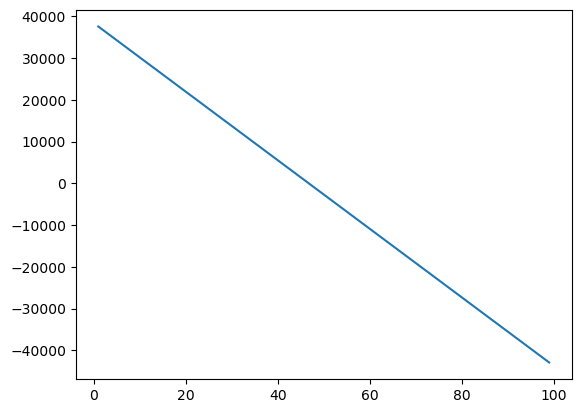

In [608]:
# new we can a plot the data tghe input and predicted
plt.plot(new_input,yhat)
plt.show()